0


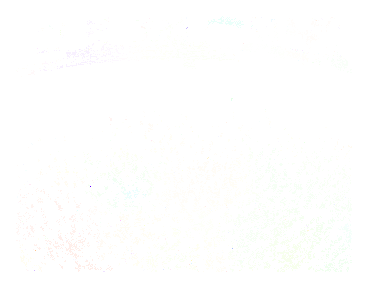

1


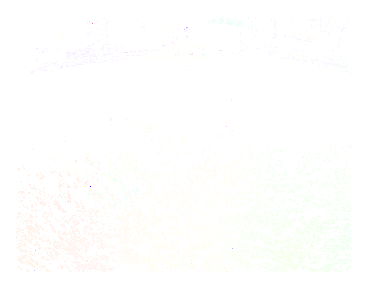

2


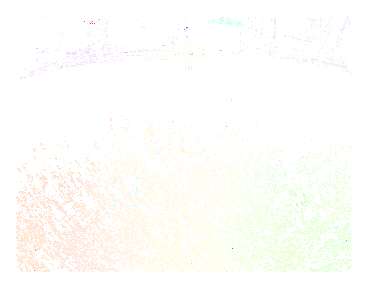

3


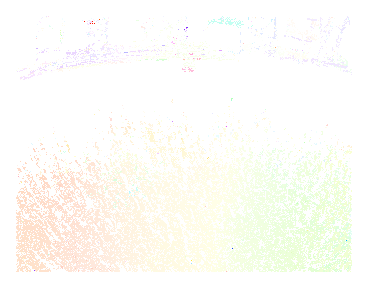

4


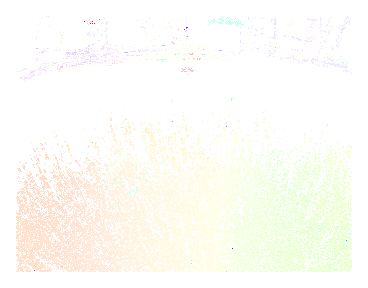

5


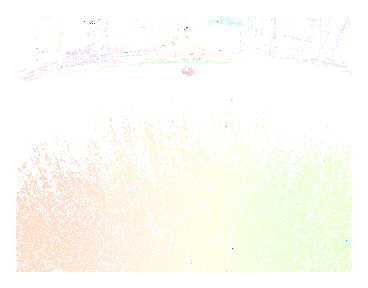

6


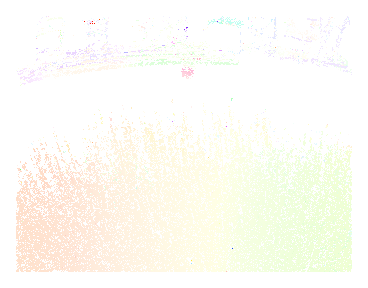

7


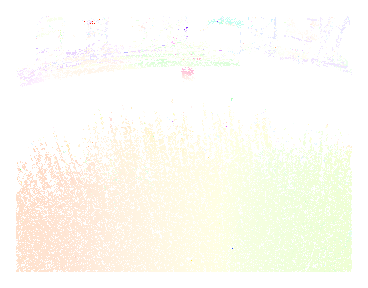

8


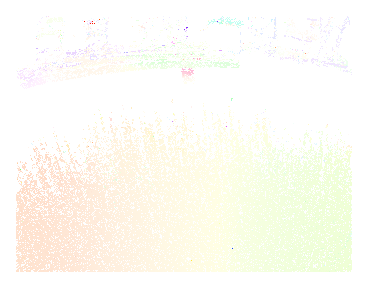

9


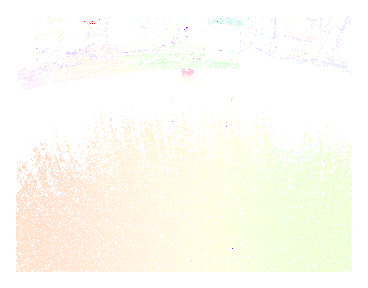

(288, 368, 2)


In [4]:
import numpy as np
import flow_vis
import command 
from IPython.display import Image, display

bin_path    = 'result/flo_{:1d}_{:05d}.bin'
png_path    = 'result/flo_{:1d}_{:05d}.png'
# W, H, C     = 272,208, 2
W, H, C     = 368,288, 2
run_cpp     = False
n_itr       = 10
n_itr_show  = 1

if run_cpp:
    res = command.run(['./process', '64']) 
    print(res.output) 
    print(res.exit)

for index in [0]: # 0: estimated flow, 1: normal flow
    for itr in range(n_itr):
        if itr%n_itr_show==0:
            print(itr)
            flo = np.fromfile(bin_path.format(index, itr), dtype=np.float64).reshape([H,W,C])
            flow_vis.save_flo(flo, png_path.format(index, itr))
            display(Image(filename=png_path.format(index, itr))) 

print(flo.shape)

